In [38]:
import pandas as pd 
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import seaborn as sns


In [86]:
churn_data = pd.read_csv('data/churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [87]:
churn_data = churn_data.drop(['RowNumber'], axis=1)

In [88]:
churn_data

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


''

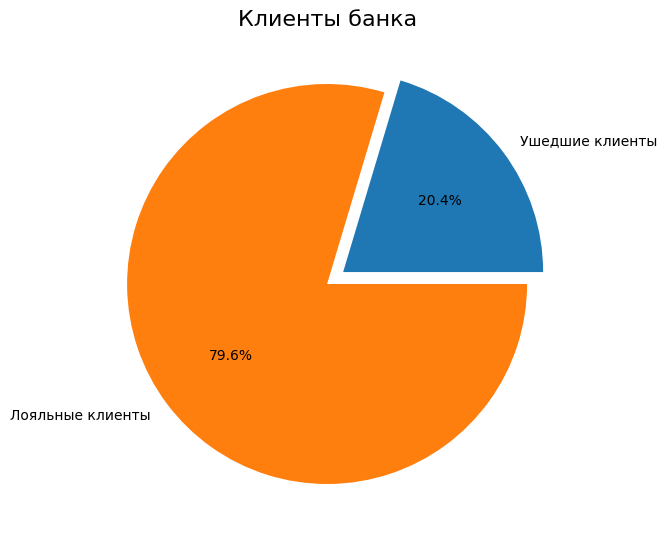

In [89]:

# Задание №9.1.

departed_client = churn_data[churn_data['Exited'] == 1]['Exited'].count()
loyal_customer = churn_data[churn_data['Exited'] == 0]['Exited'].count()
clients = [departed_client,loyal_customer]
labels1 = 'Ушедшие клиенты', 'Лояльные клиенты'
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    clients,
    labels = labels1,
    autopct='%.1f%%',
    explode = [0.1, 0]
)
axes.set_title('Клиенты банка', fontsize=16)
;


Лояльных клиентов - 79.6%, это больше, чем ушедших клиентов почти в 4 раза.

In [90]:
# Задание №9.2.
Balance=churn_data[churn_data['Balance'] > 2500]
fig = px.histogram(
    Balance,
    x='Balance',
    labels={'Balance':'Баланс на счету клиента, $', 'count' :'Количество клиентов, чел.'},
    marginal='box',
    nbins=30,
    title='Распределение баланса пользователей, у которых на счету больше 2 500 долларов'
)
fig 


Большая часть клиентов имеет на своём балансе от 120 000$ до 130 000$
Максимальый баланс на счету клиента 250 898$

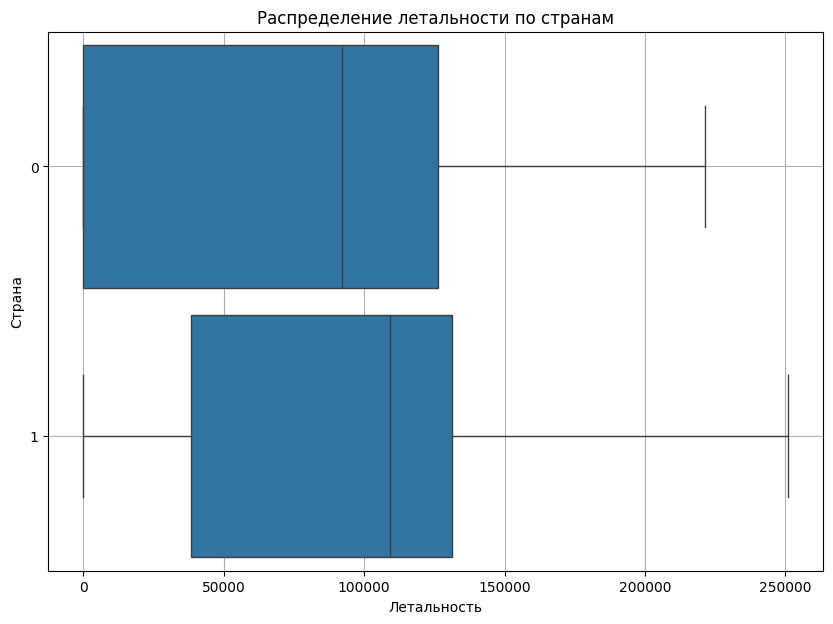

In [91]:
# Задание №9.3.

fig = plt.figure(figsize=(10, 7))
boxplot = sns.boxplot(
    data=churn_data,
    y='Exited',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение летальности по странам');
boxplot.set_xlabel('Летальность');
boxplot.set_ylabel('Страна');
boxplot.grid()

In [62]:
fig = plotly.express.box(data_frame=churn_data, x='Exited', y = 'Balance', title='Баланс на накопительном счёте ушедших и лояльных клиентов',points='all' )
fig